In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
##Here will calculate mass,K_cnt, and kap_cnt based on known values.

#Length= 10000 #length of CNT in nm
Length = 5000 #length of DNA molecule in nm
mu0 = 3.17E-24 #mass per unit length of DNA in kg/nm
strain = 0

Npoints= 102 #number of masses in DNA

N_cnt= Npoints*6 #number of masses in DNA with with the degrees of freedom per mass included
#sigma= 7.767E-25 #kg/nm^2

X0_cnt= (Length)/(Npoints-3) #discrete length of DNA in nm


#mass= mu0*X0_cnt #mass of a CNT in kg
mass= 3.17E-15*X0_cnt #mass of DNA in kg

#K_cnt= (np.pi*C*d_cnt)/(X0_cnt) #spring constant of CNT in kg/ps^2
#K_cnt= 1.61E-31 #spring constant of DNA in kg/ps^2
K_cnt= 2E-26 #spring constant of DNA in kg/ps^2

#kap_cnt= (K_cnt*d_cnt*d_cnt)/8 #torque applied to CNT in kg*nm^3/ps^2
kap_cnt= 2.07E-25 #torque applied to CNT in kg*nm^3/ps^2

##We now populate arrays using the calculated values

mass_array=np.zeros(Npoints)
K_cnt_array=np.zeros(Npoints)
kap_cnt_array=np.zeros(Npoints)

mass_array.fill(mass)
K_cnt_array.fill(K_cnt)
kap_cnt_array.fill(kap_cnt)
print(mass_array)
print(K_cnt_array)
print(kap_cnt_array)

[1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13
 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13
 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13
 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13
 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13
 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13
 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13
 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13
 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13
 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13
 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13
 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13
 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13
 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13 1.6010101e-13
 1.601

In [3]:
##Here we write in files for mass,K_cnt, and kap_cnt using the populated arrays above

_fbase= './initfiles/mass'
for i in range(0,10):
    _fname= _fbase + '_00' + str(i) + '.txt'
    _fid=open(_fname,'w+b')
    _fid.write(bytearray(mass_array))
    _fid.close()
    
for i in range(10,48):
    _fname= _fbase + '_0' + str(i) + '.txt'
    _fid=open(_fname,'w+b')
    _fid.write(bytearray(mass_array))
    _fid.close()

_fbase='./initfiles/K_cnt'
for i in range(0,10):
    _fname= _fbase + '_00' + str(i) + '.txt'
    _fid=open(_fname,'w+b')
    _fid.write(bytearray(K_cnt_array))
    _fid.close()
    
for i in range(10,48):
    _fname= _fbase + '_0' + str(i) + '.txt'
    _fid=open(_fname,'w+b')
    _fid.write(bytearray(K_cnt_array))
    _fid.close()

_fbase='./initfiles/kap_cnt'
for i in range(0,10):
    _fname= _fbase + '_00' + str(i) + '.txt'
    _fid=open(_fname,'w+b')
    _fid.write(bytearray(kap_cnt_array))
    _fid.close()
    
for i in range(10,48):
    _fname= _fbase + '_0' + str(i) + '.txt'
    _fid=open(_fname,'w+b')
    _fid.write(bytearray(kap_cnt_array))
    _fid.close()

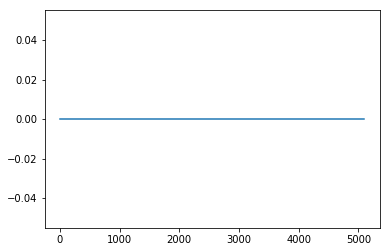

In [4]:
##Here we calculate the initial position of a string with persistence length similar to DNA (The XO_cnt calculated above)

_x=np.arange(0,Npoints)[:]
_y=np.zeros(np.shape(_x))

_y=_x*0

x=np.zeros(Npoints)
x[::]=_x*X0_cnt*(1+strain)
y=np.zeros(Npoints)
y[::]=_y

#print(x)
#print(y)

_outdata=np.zeros(Npoints*6)
_outdata[0::6]=x
_outdata[1::6]=y

#print(_outdata)

plt.plot(x,y)
plt.show()

In [5]:
##Generate an inputFile for the initial position of this DNA molecule

_fbase='./initfiles/inputFile'
_fname= _fbase + '_0' + str(47) + '.txt'
_fid=open(_fname,'w+b')
_fid.write(bytearray(_outdata))
_fid.close()

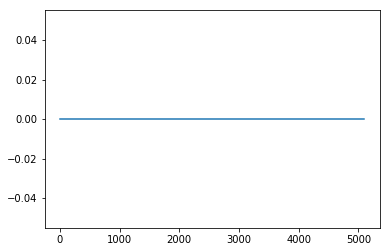

In [6]:
##Read in file to double check that we generated the file successfully 

_fname='./initfiles/inputFile_047.txt'
_fid=open(_fname)
_data=np.fromfile(_fid,dtype='float')
Npoints=len(_data)/6
_fid.close()
x_init=_data[0::6]
y_init=_data[1::6]
plt.plot(x_init,y_init)
plt.show()